# List Full Names of all the participants in your team below:
1. Joyce Sommer
2. Yinxia Chen
3. Jonathan Choi
4. Aaron Liang
5. Anmol Rastogi
6. Edmund Wu
7. Surya Muthiah Pillai
8. Kurt Su
9. Yuan Meng
10. Kapindran Kulandaivelu
11. 


Hello Machine Learning Engineer Sera Team, 

You have been given a data which is obtained from **Air Quality** of Seattle City. The dataset contains 788 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device.

Number of Instances: 789 <br>
Number of Attributes: 14 (including the target variable `y`)

Attribute Information: 
* **y**  AQI Air Quality Index
* **f1** True hourly averaged concentration CO in mg/m^3 (reference analyzer)
* **f2** PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
* **f3** True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
* **f4** True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
* **f5** PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
* **f6** True hourly averaged NOx concentration in ppb (reference analyzer)
* **f7** PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
* **f8** True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
* **f9** PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
* **f10** PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
* **f11** Temperature in Â°C
* **f12** Relative Humidity (%)
* **f13** AH Absolute Humidity

There are no missing Attribute Values.

Your task is to implement a **Linear Regression model using Gradient Descent Solution** for predicting the Air Quality Index for Seattle City.

## Gradient Descent Solution
The **genesis equation** for Linear Regression is of the form:

$y(x,w) = W.x + b$  

* $y(x,w)$ is predicted output,
* $x$ is the Input
* $W = [W_{1}, W_{2}, .. , W_{F}]$ are the parameters to be learned from training samples with $F$ Features
* $b$ is the bias



YOU NEED TO IMPLEMENT an iterative solution to solve for $W$ (Gradient Descent Solution) 

<font color="red">DO NOT USE SKLEARNS LINEAR REGRESSION LIBRARY DIRECTLY.</font>

### **Question:** In the following code cell implement the following:
* Step 1: Import the dataset (AirQualitySeattle.csv) using Pandas Dataframe (Step 1 Implemented already)
* Step 2: Partition your dataset into training testing and validation using sklearns train_test_split library and split the features and target labels into seperate variables (Step 2 Implemented already)
* Step 3: Scale the features using sklearns min max scaling function (Step 3 Implemented already)
* Step 4: Convert Scaled Features and Labels into numpy arrays with dimensions required by closed form solution (Step 4 Implemented already)
* Step 5: Initialize the learning rate, number of epochs, weight vector, bias scalar and other variables required for tracking cost.
* Step 6: Train with Training Dataset using Gradient Descent Solution
  Iteratively update the weights and biases for each epoch using:
  * Step 6.1: Use genesis equation $\hat{y} = W^{T}.X + b$ where $W$ is the weight array, $X$ is the input features and $\hat{y}$ is the predicted value. (You will have to perform same operation on validation set as well)
  * Step 6.2: Find Mean Squared Error (MSE) Loss Function (L) for training and validation set using predicted value $\hat{y}$ and truth value $y$
    * MSE Train Cost = $\frac{1}{n} \sum_{i=1}^{i=n} (y\_train_{i} - \hat{y}\_train_{i})^{2}$
  * Step 6.3: Find $ \Delta W_{j} = \frac{\delta L}{\delta W_{j}}$ and $ \Delta b = \frac{\delta L}{\delta b}$ where $j = 1$ to $F$(Proof for finding  $\Delta W$ and $\Delta b$ is available in the appendix below)
    * $ \Delta W_{j} = \frac{\delta L}{\delta W_{j}} = \frac{2}{n}\sum_{i=1}^{i=n}(y\_train_{i} - \hat{y}\_train_{i})*x_{ij}$
    * $ \Delta b = \frac{\delta L}{\delta b} = \frac{2}{n}\sum_{i=1}^{i=n}(y\_train_{i} - \hat{y}\_train_{i})$
  * Step 6.4: Update $W$ and $b$ using learning rate($\eta$) as follows:
    - $W_{j} = W_{j} - \eta*\Delta W_{j}$
    - $b = b - \eta*\Delta b$
  * Step 6.5: Store MSE Cost for training and validation in cost tracking lists
* Step 7: Plot validation and training cost vs number of epochs (Already Implemented)
* Step 8: Test using Testing Dataset
  * Step 8.1: Use genesis equation $\hat{y} = W^{T}.X_{test} + b$ where $W$ is the weight array, $X_{test}$ is the input test features and $\hat{y}$ is the predicted value.
  * Step 8.2: Calculate Mean Squared Error (MSE) for Test Dataset
    * MSE Test Cost$ = \frac{1}{n}\sum_{i=1}^{i=n} (y\_test_{i} - \hat{y}\_test_{i})^{2}$ 

## TA Response

In [ ]:
# Step 1 already implemented
import pandas as pd
import io
import requests
url="https://raw.githubusercontent.com/Mihir2/BreakoutSessionDataset/master/AirQualitySeattle.csv"
s = requests.get(url).content
data = pd.read_csv(io.StringIO(s.decode('utf-8')))
data

# Step 2 already implemented
import numpy as np
from sklearn.model_selection import train_test_split
output = data['y']
input = data.to_numpy()[:,1:]
x_train, x_val_test, y_train, y_val_test = train_test_split(input, output, test_size = 0.8)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, output, test_size = 0.5)

# Step 3 already implemented
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sc_xtrain = scaler.fit_transform(x_train)
sc_xval = scaler.fit_transform(x_val)
sc_xtest = scaler.transform(x_test)

# Step 4 already implemented
y_train_arr = y_train.to_numpy().reshape(y_train.shape[0],1).T
x_train_arr = sc_xtrain.T
y_val_arr = y_val.to_numpy().reshape(y_val.shape[0],1).T
x_val_arr = sc_xval.T
y_test_arr  = y_test.to_numpy().reshape(y_test.shape[0],1).T
x_test_arr  = sc_xtest.T

# Step 5 already implemented
learningrate = 0.005
epochs = 1000
bias = 0

number_of_features         = x_train_arr.shape[0]
number_of_train_datapoints = x_train_arr.shape[1]
number_of_val_datapoints   = x_val_arr.shape[1]
number_of_test_datapoints  = x_test_arr.shape[1]

weights = np.random.randn(number_of_features,1)

training_cost_track = []
val_cost_track = []

# Step 6
for epoch in range(epochs):
    
    # Step 6.1 y_pred = wT.X + b (For Training and Validation dataset)
    train_pred = np.dot(weights.T, x_train_arr) + bias
    val_pred   = np.dot(weights.T, x_val_arr)   + bias
    
    # Step 6.2 MSE Cost for Training and Validation Dataset
    train_cost = np.sum((train_pred - y_train_arr)**2)/number_of_train_datapoints
    val_cost   = np.sum((val_pred - y_val_arr)**2)/number_of_val_datapoints
    
    # Step 6.3: Calculate derivatives
    dz = train_pred - y_train_arr
    dw = (1/number_of_train_datapoints) * np.dot(x_train_arr, dz.T)
    db = (1/number_of_train_datapoints) * np.sum(dz)
    
    # Step 6.4: update weights and bias
    weights = weights - learningrate * dw
    bias = bias - learningrate * db

    # Step 6.5: Store MSE Cost for training and validation in seperate cost tracking list
    training_cost_track.append(train_cost)
    val_cost_track.append(val_cost)

In [ ]:
# Step 8.1: Test using Testing Dataset: Get the predicted values 
test_pred = np.dot(weights.T, x_test_arr) + bias

# Step 8.2: Calculate the MSE for Testing dataset
test_cost = np.sum((test_pred - y_test_arr)**2)/number_of_test_datapoints

## Student Response

In [ ]:
# Step 1 already implemented
import pandas as pd
import io
import requests
url="https://raw.githubusercontent.com/Mihir2/BreakoutSessionDataset/master/AirQualitySeattle.csv"
s = requests.get(url).content
data = pd.read_csv(io.StringIO(s.decode('utf-8')))
data

# Step 2 already implemented
import numpy as np
from sklearn.model_selection import train_test_split
output = data['y']
input = data.to_numpy()[:,1:]
x_train, x_val_test, y_train, y_val_test = train_test_split(input, output, test_size = 0.8)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size = 0.5)

# Step 3 already implemented
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sc_xtrain = scaler.fit_transform(x_train)
sc_xval = scaler.fit_transform(x_val)
sc_xtest = scaler.transform(x_test)

# Step 4 already implemented
y_train_arr = y_train.to_numpy().reshape(y_train.shape[0],1).T
print(type(y_train))
x_train_arr = sc_xtrain.T
y_val_arr = y_val.to_numpy().reshape(y_val.shape[0],1).T
x_val_arr = sc_xval.T
y_test_arr  = y_test.to_numpy().reshape(y_test.shape[0],1).T
x_test_arr  = sc_xtest.T

# Step 5 already implemented
learningrate = 0.005
epochs = 1000
bias = 0

number_of_features         = x_train_arr.shape[0]
number_of_train_datapoints = x_train_arr.shape[1]
number_of_val_datapoints   = x_val_arr.shape[1]
number_of_test_datapoints  = x_test_arr.shape[1]

weights = np.random.randn(number_of_features,1)

training_cost_track = []
val_cost_track = []


print(pd.__version__)
# Step 6

for epoch in range(epochs):
    
    
    # Step 6.1 y_pred = wT.X + b (For Training and Validation dataset)
    y_pred = np.dot(weights.T,x_train_arr) + bias
    y_pred_val = np.dot(weights.T,x_val_arr) + bias
    # Step 6.2 MSE Cost for Training and Validation Dataset
    arrr = (y_train_arr-y_pred)**2
    sum_ = sum(arrr.flatten())
    MSE_cost = sum_/y_train_arr.shape[1]
    
    arrr1 = (y_val_arr-y_pred_val)**2
    sum_val = sum(arrr1.flatten())
    MSE_cost_val = sum_val/y_val_arr.shape[1]
    
    # Step 6.3: Calculate derivatives
    
    arr = np.dot(y_train_arr-y_pred, x_train_arr.T)
    s = sum(arr.flatten())*(2/y_train_arr.shape[1])
    dW = -s
    
    arr1 = y_train_arr-y_pred
    s1 = sum(arr1.flatten())*(2/y_train_arr.shape[1])
    dB = -s1
    
    print(dB)
    # Step 6.4: update weights and bias
    weights = weights - learningrate*dW
    bias = bias - learningrate*dB
    # Step 6.5: Store MSE Cost for training and validation in seperate cost tracking list
    training_cost_track.append(np.squeeze(MSE_cost))
    val_cost_track.append(np.squeeze(MSE_cost_val))


    

<class 'pandas.core.series.Series'>
1.1.2
-419.4678670088991
-104.53180425802529
-35.289972968198974
-20.063366133737745
-16.711863983554085
-15.97107329001158
-15.804241847465534
-15.763595101418733
-15.750691006856124
-15.74388734165043
-15.73842612042773
-15.733261312347475
-15.728162949898694
-15.723080474922638
-15.71800277192927
-15.712927396794981
-15.707853811772404
-15.702781898226824
-15.697711629663782
-15.692642999846141
-15.687576006990449
-15.682510650292192
-15.677446929162613
-15.672384843060028
-15.667324391453812
-15.66226557381543
-15.657208389617304
-15.65215283833171
-15.647098919431654
-15.642046632389897
-15.636995976679506
-15.631946951773942
-15.62689955714642
-15.621853792270677
-15.616809656620362
-15.611767149669525
-15.606726270892246
-15.601687019762744
-15.596649395755586
-15.591613398345322
-15.586579027006668
-15.581546281214653
-15.5765151604445
-15.571485664171314
-15.566457791870711
-15.561431543018255
-15.556406917089772
-15.551383913561361
-15.5463

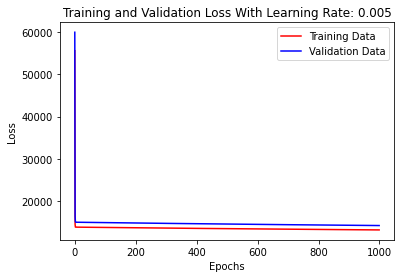

In [ ]:
# Step 7: Plot MSE cost for training and validation set vs number of epochs (Already Implemented)
import matplotlib.pyplot as plt
plt.title('Training and Validation Loss With Learning Rate: ' + str(learningrate))
plt.plot(training_cost_track, color='red', label='Training Data')
plt.plot(val_cost_track, color='blue', label='Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Step 8.1: Test using Testing Dataset: Get the predicted values 
y_pred_test = weights.T @ x_test_arr + bias

# Step 8.2: Calculate the MSE for Testing dataset
np.power(y_test_arr - y_pred_test, 2).mean()


12925.89878896935

### Appendix (Proof)

![!picture](https://drive.google.com/uc?export=view&id=1MVcYLfEzAlKcumhLiwrsmGSn0-AAK3tg)